## EDA dev - Ocean data

In [1]:
pwd

'/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools/notebooks'

In [2]:
cd ..

/Users/ryanrappa/Desktop/GoogleDrive/ds/kaggle_tools


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from src.eda import EDA

In [4]:
df = pd.read_csv('data/bottle.csv')
df = df.select_dtypes(exclude=['object'])
df = df.dropna(thresh=800000, axis=1)
df = df.dropna()
df = df[df.columns.drop(list(df.filter(regex='R_')))] #dropping duplicate columns
df = df.drop(['Cst_Cnt', 'Btl_Cnt'], axis=1) #dropping index-like columns

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733418 entries, 0 to 864860
Data columns (total 12 columns):
Depthm    733418 non-null int64
T_degC    733418 non-null float64
Salnty    733418 non-null float64
STheta    733418 non-null float64
RecInd    733418 non-null int64
T_prec    733418 non-null float64
S_prec    733418 non-null float64
NH3q      733418 non-null float64
C14A1q    733418 non-null float64
C14A2q    733418 non-null float64
DarkAq    733418 non-null float64
MeanAq    733418 non-null float64
dtypes: float64(10), int64(2)
memory usage: 72.7 MB


In [6]:
df.columns

Index(['Depthm', 'T_degC', 'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec',
       'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'],
      dtype='object')

In [7]:
df.head()

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq
0,0,10.50,33.440,25.649,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0
1,8,10.46,33.440,25.656,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
2,10,10.46,33.437,25.654,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0
3,19,10.45,33.420,25.643,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0
4,20,10.45,33.421,25.643,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0


In [8]:
df.describe()

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq
count,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000,733418.000000
mean,228.062580,10.764656,33.861743,25.848316,4.723822,2.018854,2.694038,8.944438,8.999992,8.999992,8.999992,8.999992
std,309.103372,4.242786,0.460998,1.180908,1.865705,0.154670,0.460814,0.524139,0.002860,0.002860,0.002860,0.002860
min,0.000000,1.440000,28.431000,20.934000,3.000000,1.000000,2.000000,4.000000,8.000000,8.000000,8.000000,8.000000
25%,50.000000,7.670000,33.510000,25.004000,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,125.000000,9.980000,33.900000,26.043000,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,300.000000,13.780000,34.210000,26.661000,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,5351.000000,31.140000,37.034000,250.784000,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [9]:
df.corr()

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq
Depthm,1.000000,-0.678720,0.566810,0.577632,0.084562,0.021492,0.024843,0.009143,0.001996,0.001996,0.001996,0.001996
T_degC,-0.678720,1.000000,-0.478726,-0.815820,-0.070713,-0.045755,-0.058888,0.005839,-0.004508,-0.004508,-0.004508,-0.004508
Salnty,0.566810,-0.478726,1.000000,0.579576,0.067181,-0.026632,-0.053060,0.023876,0.003997,0.003997,0.003997,0.003997
STheta,0.577632,-0.815820,0.579576,1.000000,0.063690,0.023134,0.028609,0.002202,0.004410,0.004410,0.004410,0.004410
RecInd,0.084562,-0.070713,0.067181,0.063690,1.000000,0.033684,0.388629,0.014167,0.002643,0.002643,0.002643,0.002643
T_prec,0.021492,-0.045755,-0.026632,0.023134,0.033684,1.000000,0.105959,0.012922,0.000349,0.000349,0.000349,0.000349
S_prec,0.024843,-0.058888,-0.053060,0.028609,0.388629,0.105959,1.000000,-0.070384,-0.001899,-0.001899,-0.001899,-0.001899
NH3q,0.009143,0.005839,0.023876,0.002202,0.014167,0.012922,-0.070384,1.000000,-0.000303,-0.000303,-0.000303,-0.000303
C14A1q,0.001996,-0.004508,0.003997,0.004410,0.002643,0.000349,-0.001899,-0.000303,1.000000,1.000000,1.000000,1.000000
C14A2q,0.001996,-0.004508,0.003997,0.004410,0.002643,0.000349,-0.001899,-0.000303,1.000000,1.000000,1.000000,1.000000


In [10]:
X_cols = ['Depthm', 'Salnty', 'STheta', 'RecInd', 'T_prec']
y_col = 'T_degC'
eda = EDA(df, X_cols, y_col)

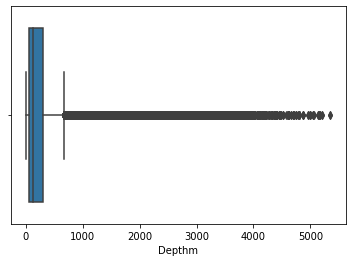

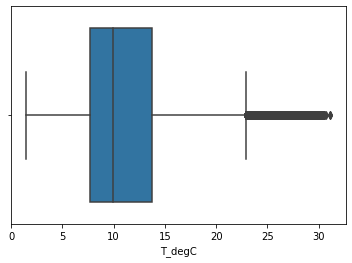

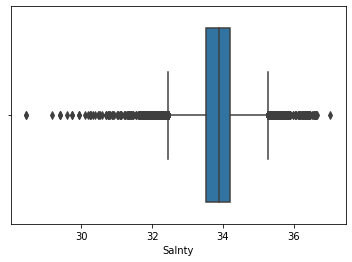

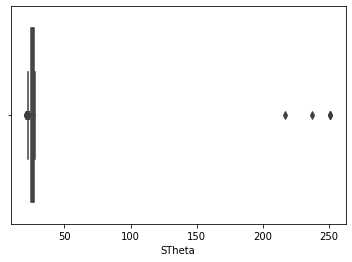

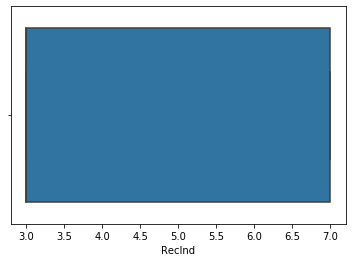

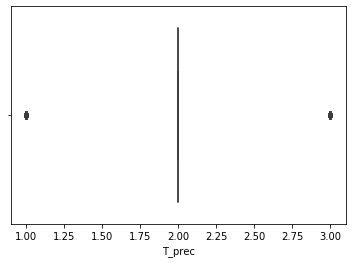

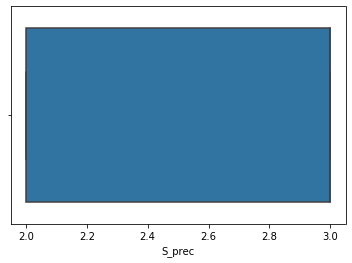

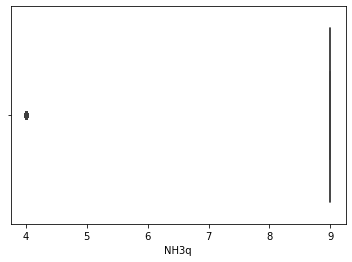

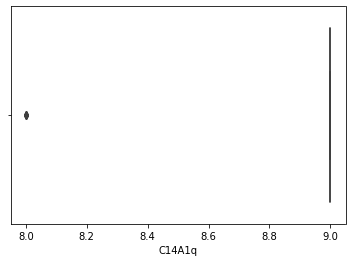

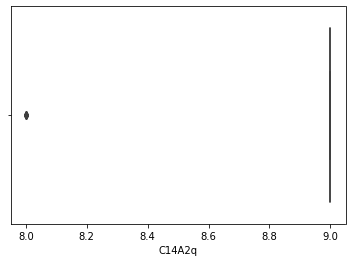

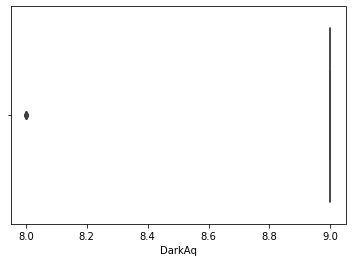

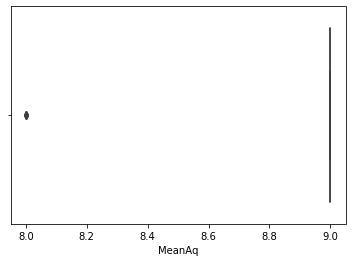

In [11]:
eda.boxplots()

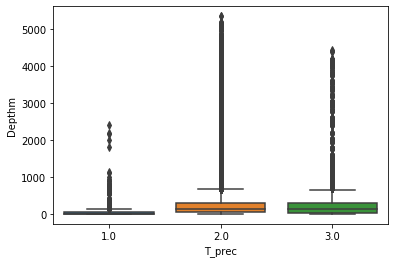

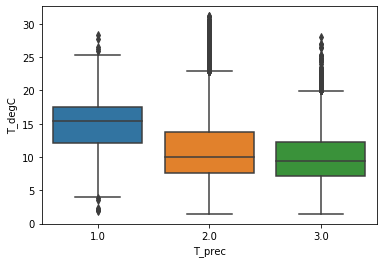

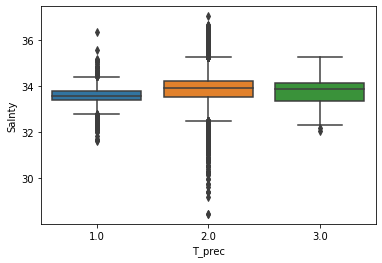

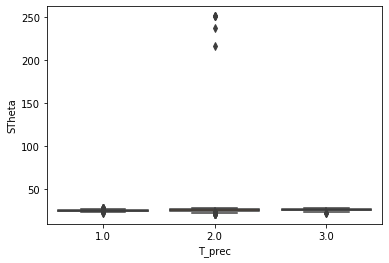

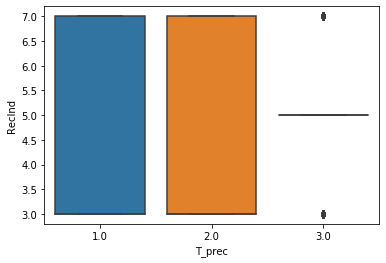

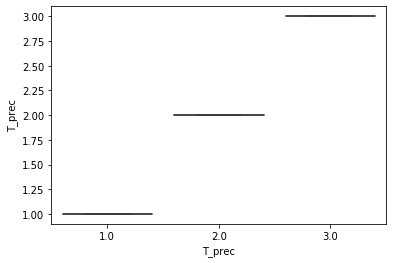

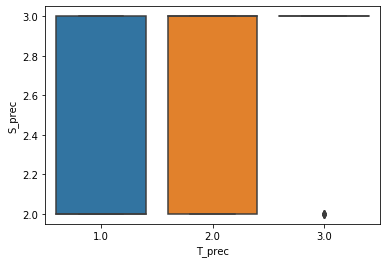

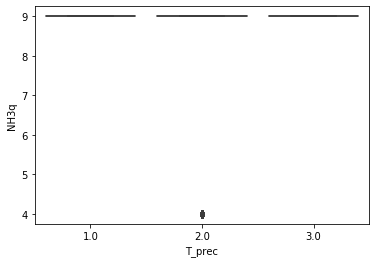

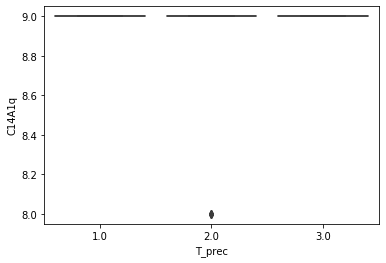

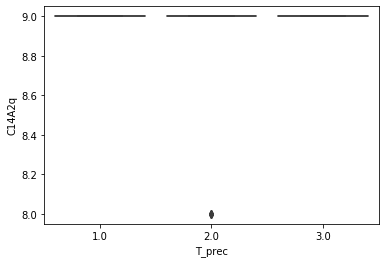

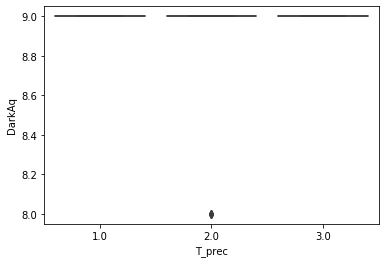

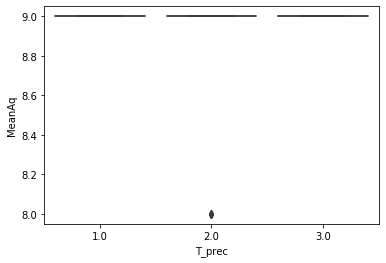

In [12]:
eda.boxplots(hue='T_prec')

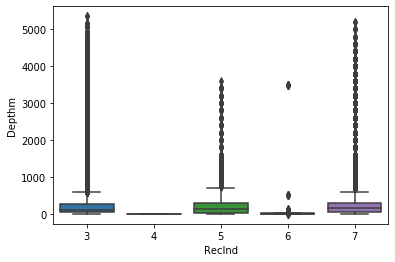

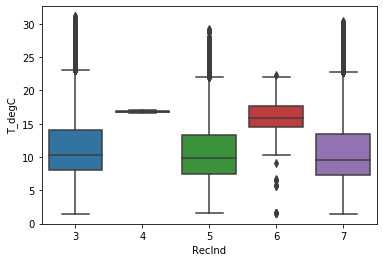

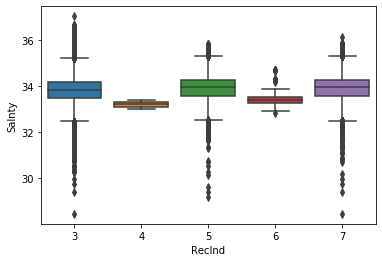

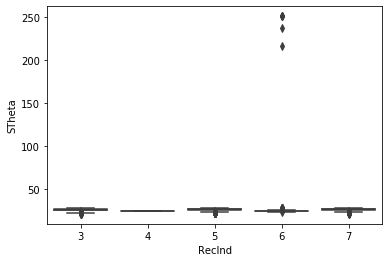

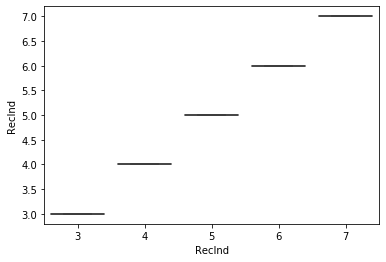

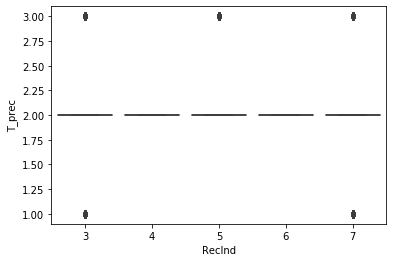

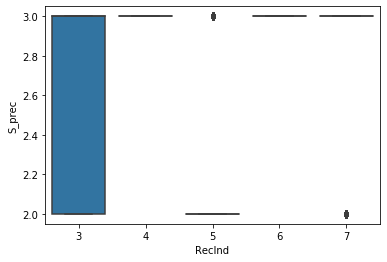

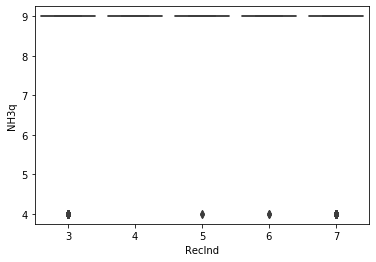

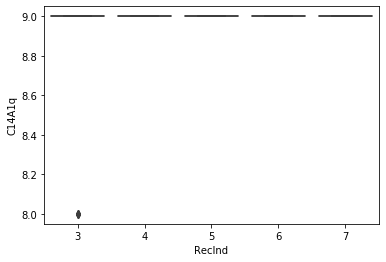

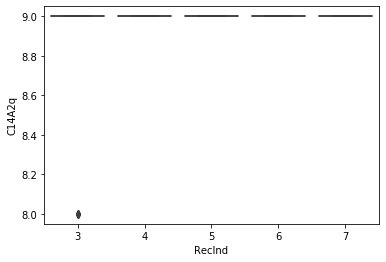

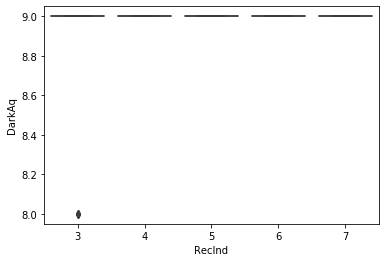

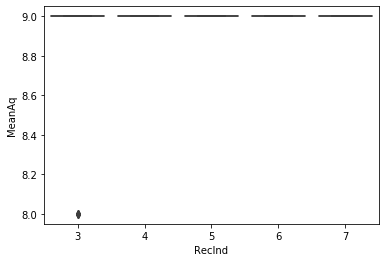

In [13]:
eda.boxplots(hue='RecInd')

In [14]:
## ID'ing outliers:
from scipy import stats
print("Rows w/ outliers:", len(df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)])) #numer of rows with outliers
print("Pct of rows w/ outliers:", round(len(df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)])/len(df), 4)) #pct outliers
# df[~(np.abs(stats.zscore(df)) < 3).all(axis=1)].head() #see rows with outliers
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] #keep only rows w/o outliers

Rows w/ outliers: 41023
Pct of rows w/ outliers: 0.0559


Pearson's r for T_degC & Depthm: -0.6787200164871353
Pearson's r for T_degC & Salnty: -0.4787258960296765
Pearson's r for T_degC & STheta: -0.8158200966035603
Pearson's r for T_degC & RecInd: -0.0707129495420858
Pearson's r for T_degC & T_prec: -0.04575460349516701
CPU times: user 36.4 s, sys: 473 ms, total: 36.9 s
Wall time: 34.4 s


<Figure size 432x288 with 0 Axes>

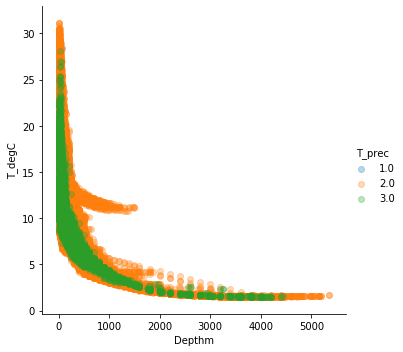

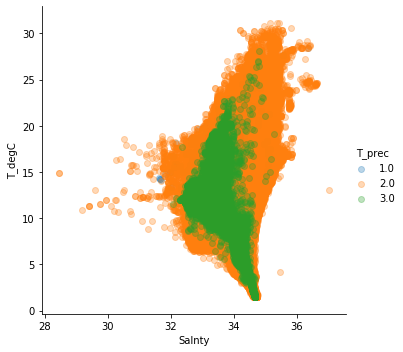

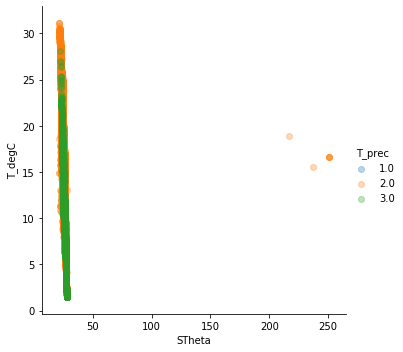

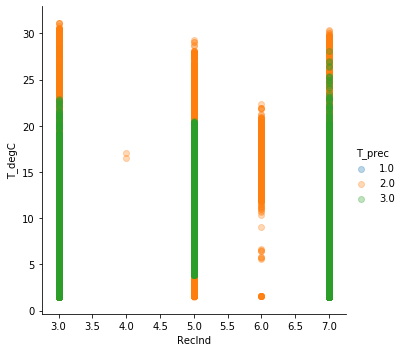

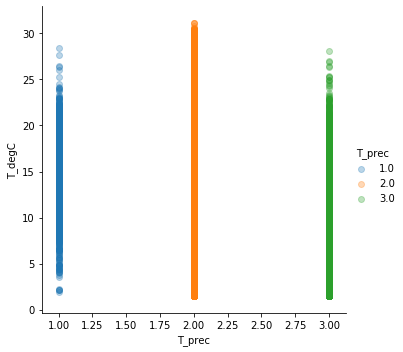

In [21]:
%%time
kwargs = {'fit_reg':False, 'hue':'T_prec', 'scatter_kws':{'alpha':0.3}}
eda.scatterplots_sns(**kwargs)

In [16]:
df['T_degC'].std() * 0.1
#confirms my interpretation of coefs from lasso plots

0.42427862774090563

In [17]:
df['Salnty'].std()

0.4609981012500553

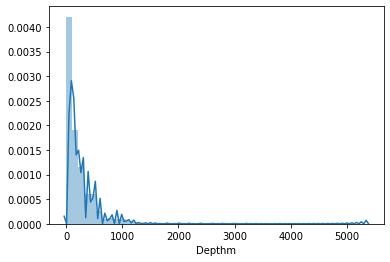

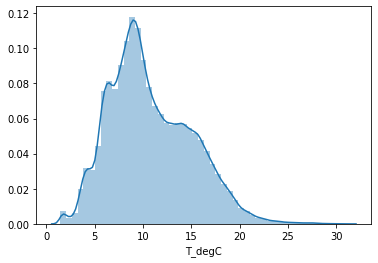

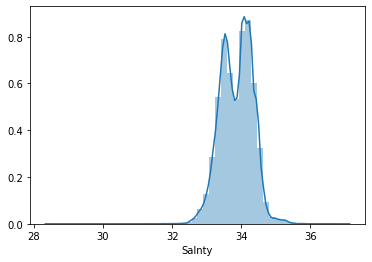

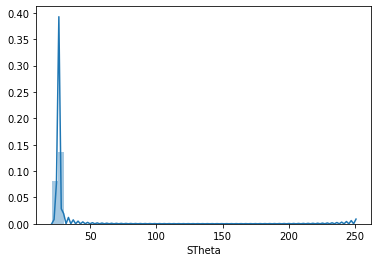

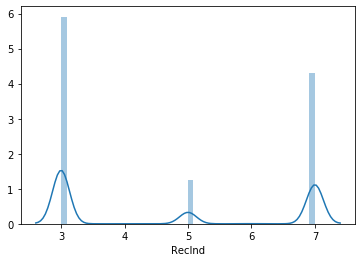

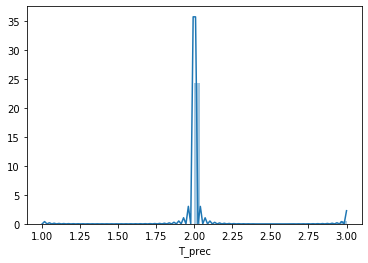

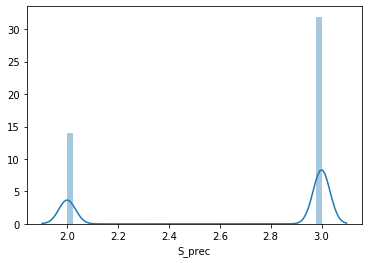

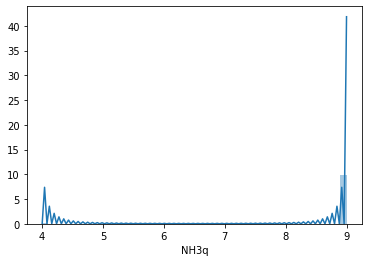

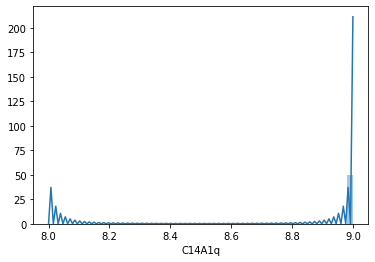

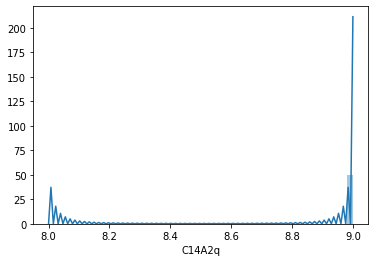

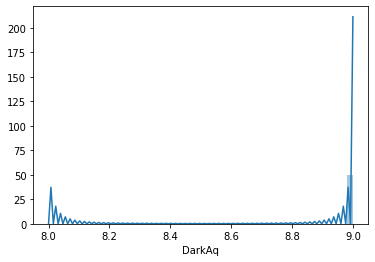

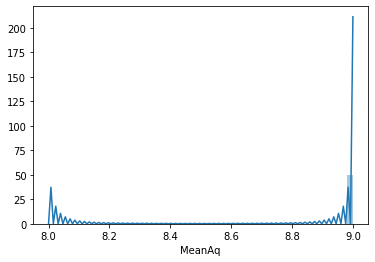

In [18]:
eda.histograms()

Pearson's r for T_degC & Depthm: -0.6787200164871353
Pearson's r for T_degC & Salnty: -0.4787258960296765
Pearson's r for T_degC & STheta: -0.8158200966035603
Pearson's r for T_degC & RecInd: -0.0707129495420858
Pearson's r for T_degC & T_prec: -0.04575460349516701
CPU times: user 13 s, sys: 170 ms, total: 13.1 s
Wall time: 10.6 s


<Figure size 432x288 with 0 Axes>

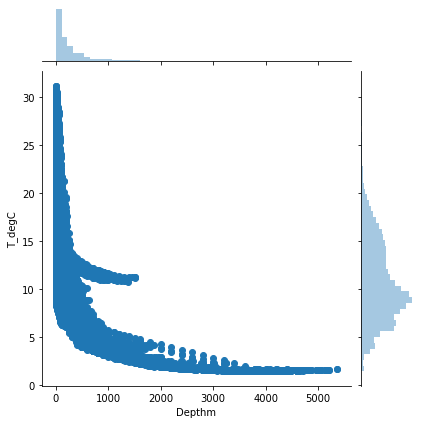

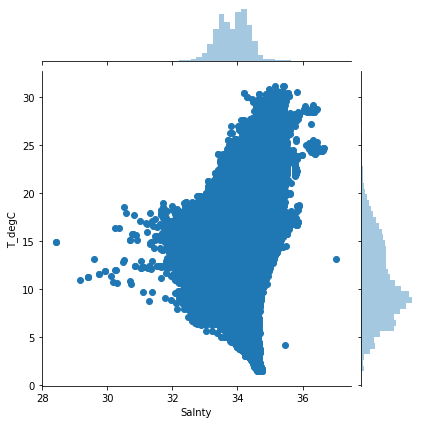

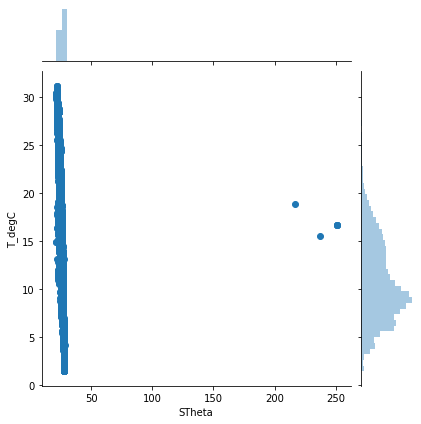

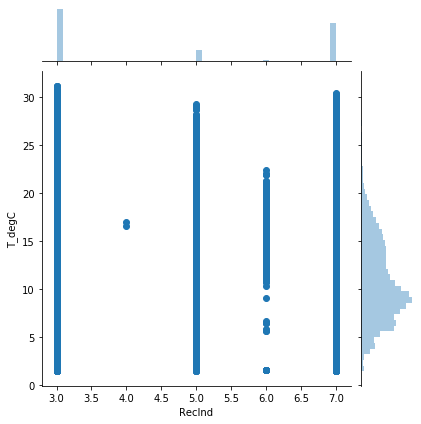

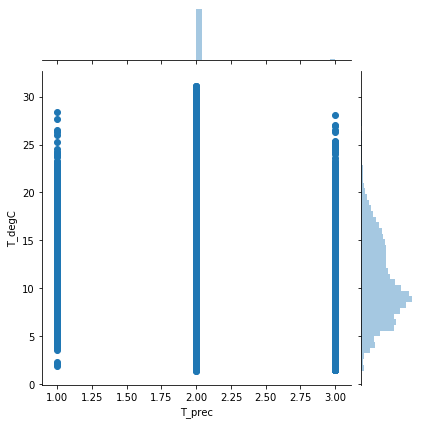

In [19]:
%%time
eda.jointplots()

CPU times: user 3.78 s, sys: 212 ms, total: 3.99 s
Wall time: 4.32 s


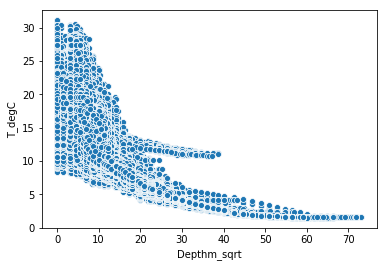

In [55]:
# %%time
# df['Depthm_sqrt'] = np.sqrt(df['Depthm'])
# #plotting sqrt of depth against temperature (not log because there are zeros)
# sns.scatterplot(x=df['Depthm_sqrt'], y=df['T_degC'])

Pearson's r for T_degC & Depthm: -0.6787200164871353
Pearson's r for T_degC & Salnty: -0.4787258960296765
Pearson's r for T_degC & STheta: -0.8158200966035603
Pearson's r for T_degC & RecInd: -0.0707129495420858
Pearson's r for T_degC & T_prec: -0.04575460349516701
CPU times: user 25.9 s, sys: 299 ms, total: 26.2 s
Wall time: 23.8 s


<Figure size 432x288 with 0 Axes>

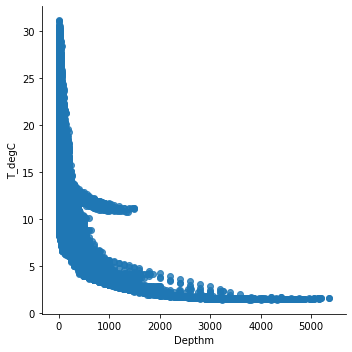

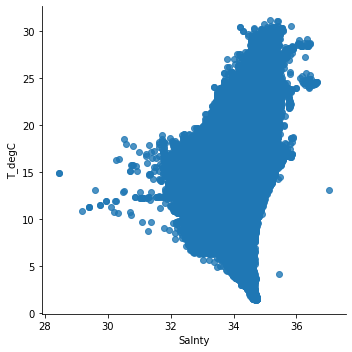

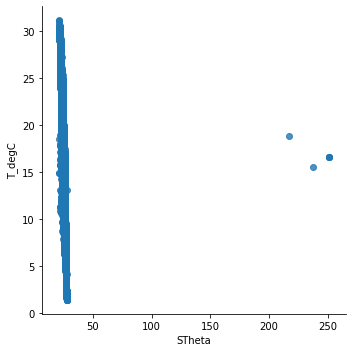

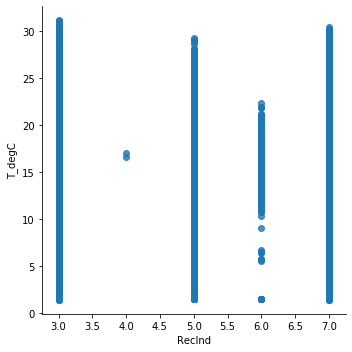

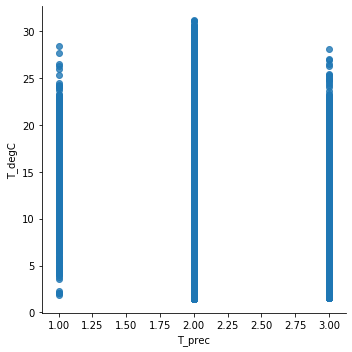

In [20]:
%%time
kwargs = {'fit_reg':False}
eda.scatterplots_sns(**kwargs)